# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
import math

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

# Loading Dataset

In [2]:
data = pd.read_csv('/kaggle/input/housedata/data.csv')

## Exploratory Data Analysis

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

**As we can see there are 4600 rows and 18 columns accounting to 82,800 values.**

In [5]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

**We can see that this dataset doesn't have NaN values**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


<AxesSubplot:>

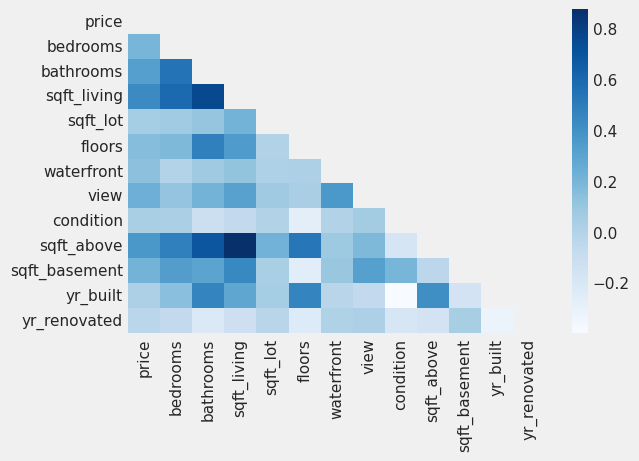

In [8]:
plt.figure(figsize=(6,4))
corr_data = data.drop(['date'], axis = 1)

corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask = corr_mask, cmap = 'Blues')
h_map

# **Price**

price columns is our target value.

In [9]:
#statistics for price

print('min: ',data.price.min())
print('max: ',data.price.max())
print('mean: ',data.price.mean())


min:  0.0
max:  26590000.0
mean:  551962.9884732141


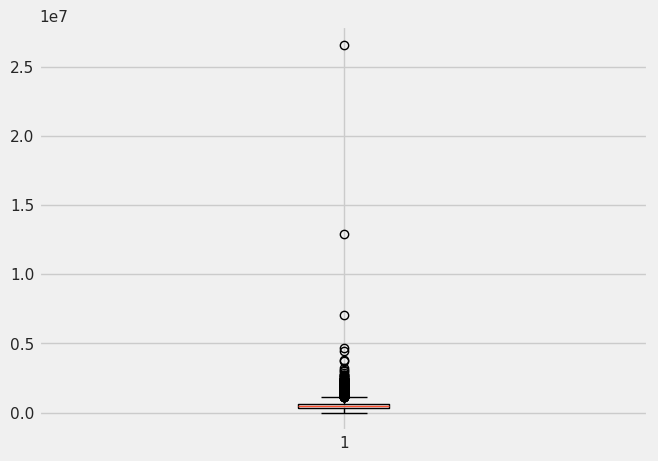

In [10]:
x= data.price
fig = plt.figure(figsize =(7, 5))
plt.boxplot(x)
plt.show()

**We can see that price column has got outliers.**

### price column before processing:

<AxesSubplot:xlabel='price', ylabel='Count'>

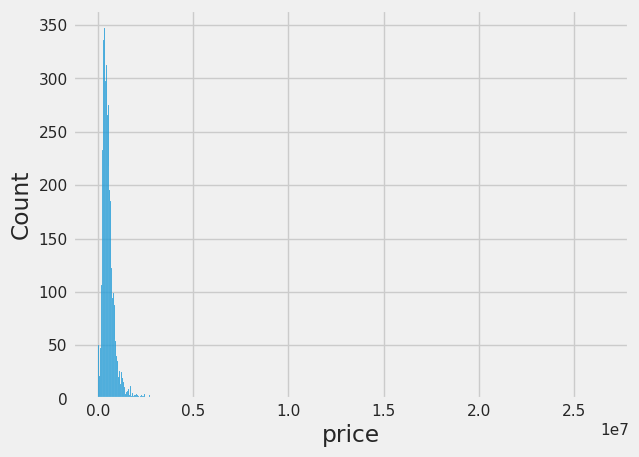

In [11]:
sns.histplot(data.price)

**Let's delete the outliers by implementing the remove_outliers function.**

In [12]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

In [13]:
data = remove_outliers(data, 'price')

Outliers of price are removed.



### price column after processing:

((array([-3.59729352, -3.35962078, -3.22850623, ...,  3.22850623,
          3.35962078,  3.59729352]),
  array([   7800.,   80000.,   83000., ..., 1150000., 1150000., 1150000.])),
 (211053.47018069463, 487456.9019044595, 0.9780093595347804))

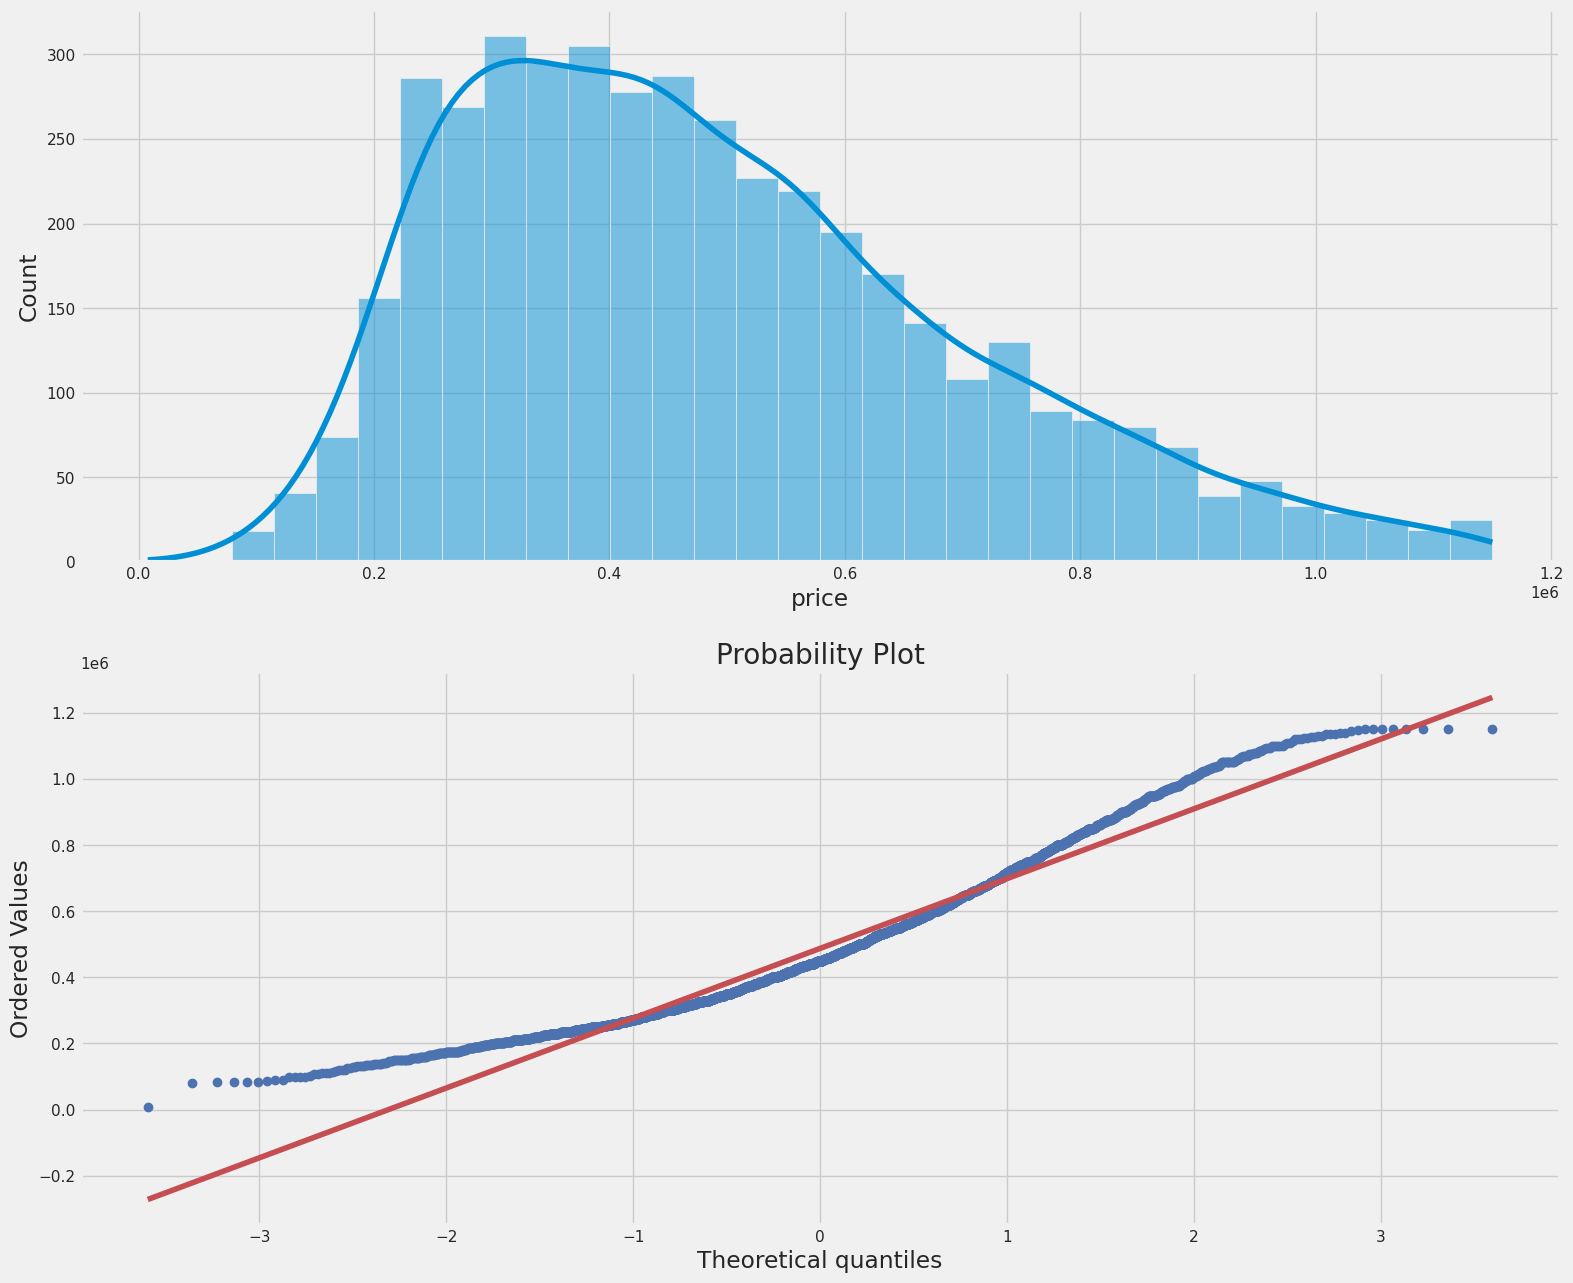

In [14]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data['price'], plot=ax2)

Text(0.5, 0, 'index')

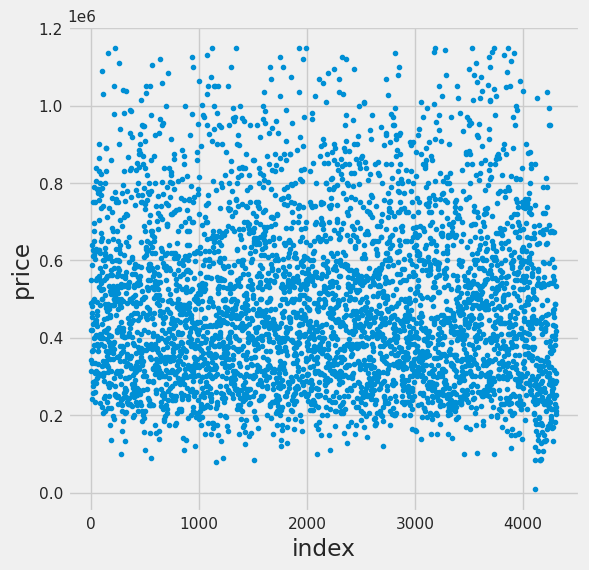

In [15]:
y = np.array(data.price)
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(range(len(y)), y, '.')
plt.ylabel('price')
plt.xlabel('index')

In [16]:
data.shape

(4311, 18)

In [17]:
print('min: ',data.price.min())
print('max: ',data.price.max())
print('mean: ',data.price.mean())


min:  7800.0
max:  1150000.0
mean:  487456.9019044595


<b>price</b> column now is processed and outliers are removed, and we can see now that it's normaly destributed.

- Minimum value was  <b>0.0</b>  but now it's  <b>7800.0</b>
- Maximum value was  <b>2.6E7</b>  but now it's  <b>1.15E6</b>
- Mean was   <b>551962.9</b>  but now it's  <b>487456.9</b>

# **date**

<b>date</b> is a categorical column, we are going to change it to datetime by <b>pd.to_datetime</b>

In [18]:
data.date = pd.to_datetime(data.date)

In [19]:
data.date.dt.year.value_counts()

2014    4311
Name: date, dtype: int64

<AxesSubplot:xlabel='date', ylabel='Density'>

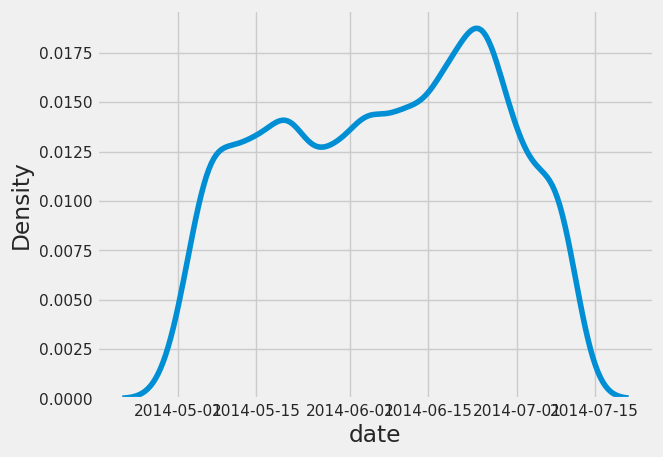

In [20]:
sns.kdeplot(data["date"])

**The previous visualization shows the density among the date column.**

<AxesSubplot:xlabel='date', ylabel='price'>

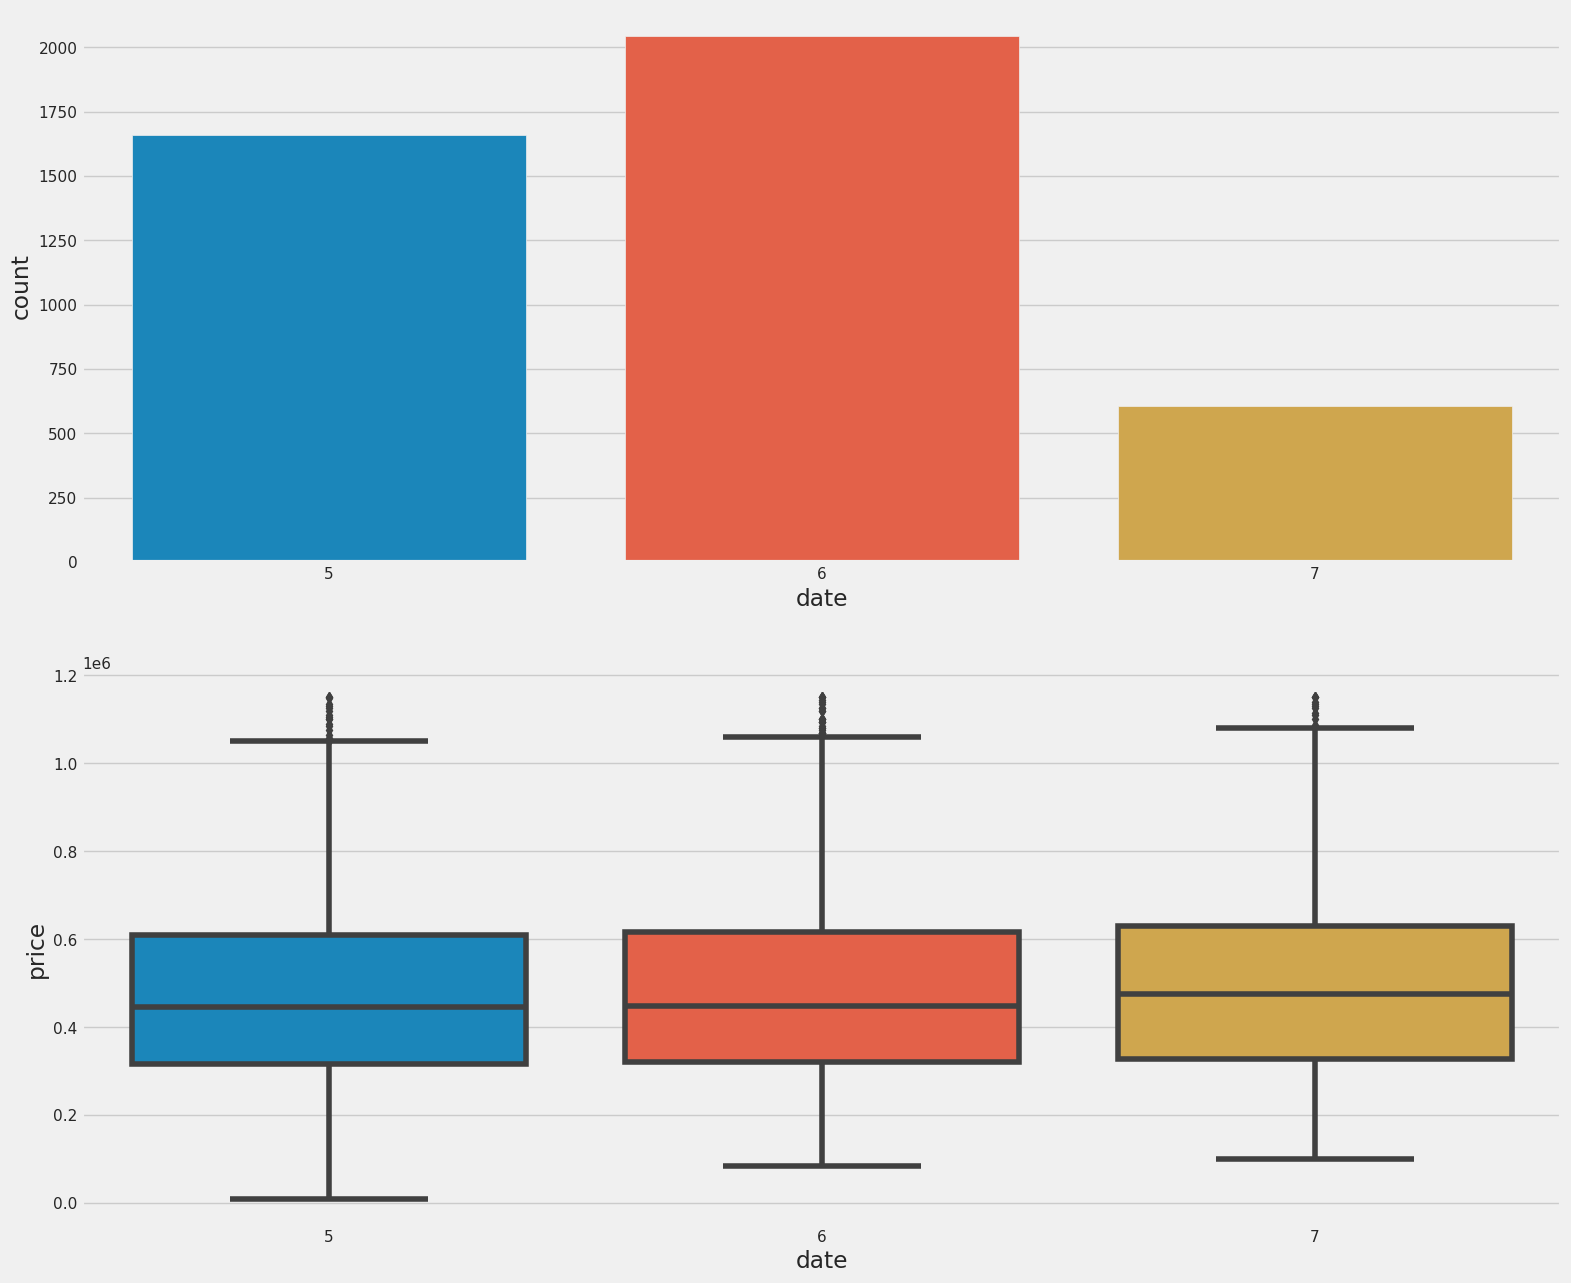

In [21]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data.date.dt.month, ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x=data.date.dt.month, y='price', data=data, ax=ax2)

**The previous visualization shows the relation between price and months.**

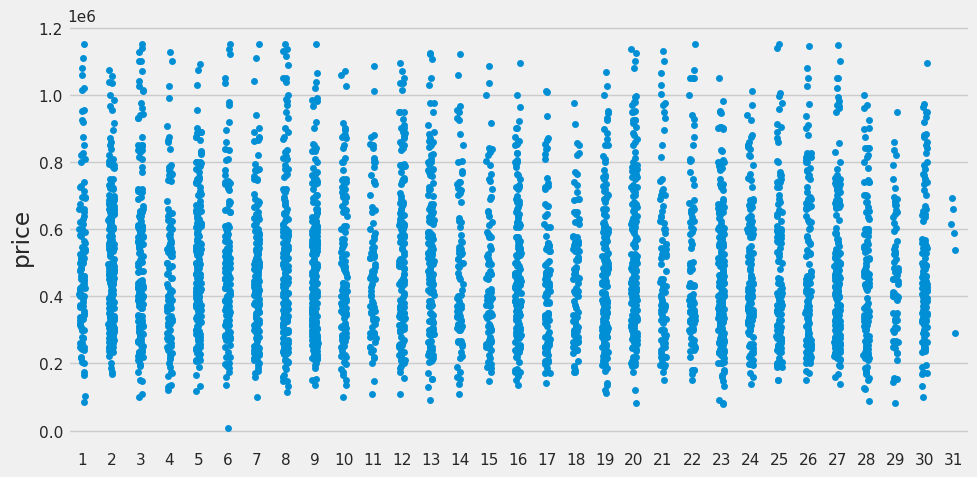

In [22]:
sns.catplot(x=data.date.dt.day.values, y='price', data=data, height=5, aspect=2)

**The previous visualization shows the relation between price and days.**

**It's obvious now from the visualizations that date column is useless,<font color = red >and have to be deleted </font>.**

In [23]:
data.drop('date', axis=1, inplace=True)

**Checking:**

In [24]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


# **Bedrooms**

From intution we can see that bathrooms and bedrooms would be physical entity and thus will not be able to contain float values. So we will change them to int column.

We will just create a function and pass the value into it as the dataframe as whole.


In [25]:
def float_to_int(value):
    return math.floor(value)

In [26]:
for i in ["bedrooms"]:
    data[i] = data[i].apply(float_to_int)

Now we will see the realation between <b>bedrooms</b> and <b>price</b> columns.

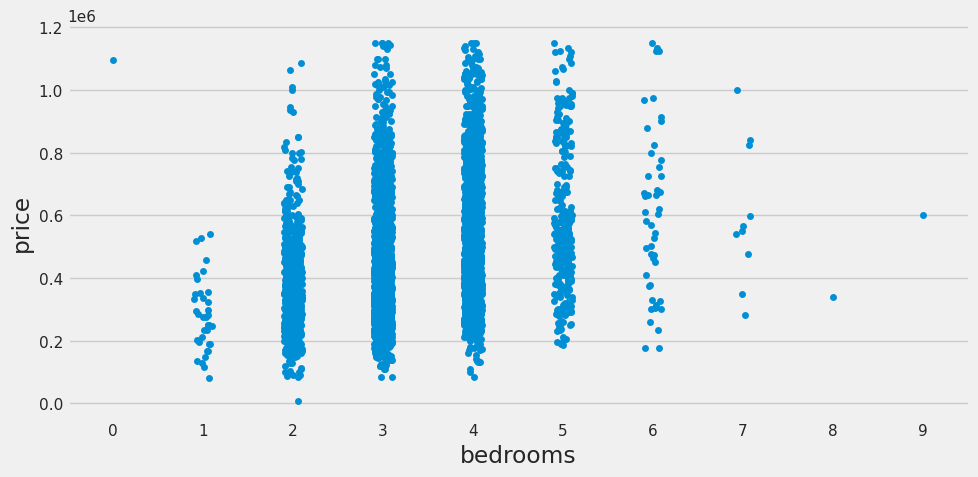

In [27]:
sns.catplot(x='bedrooms', y='price', data=data, height=5, aspect=2)

Checking if <b>bedrooms</b> column has outliers.

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

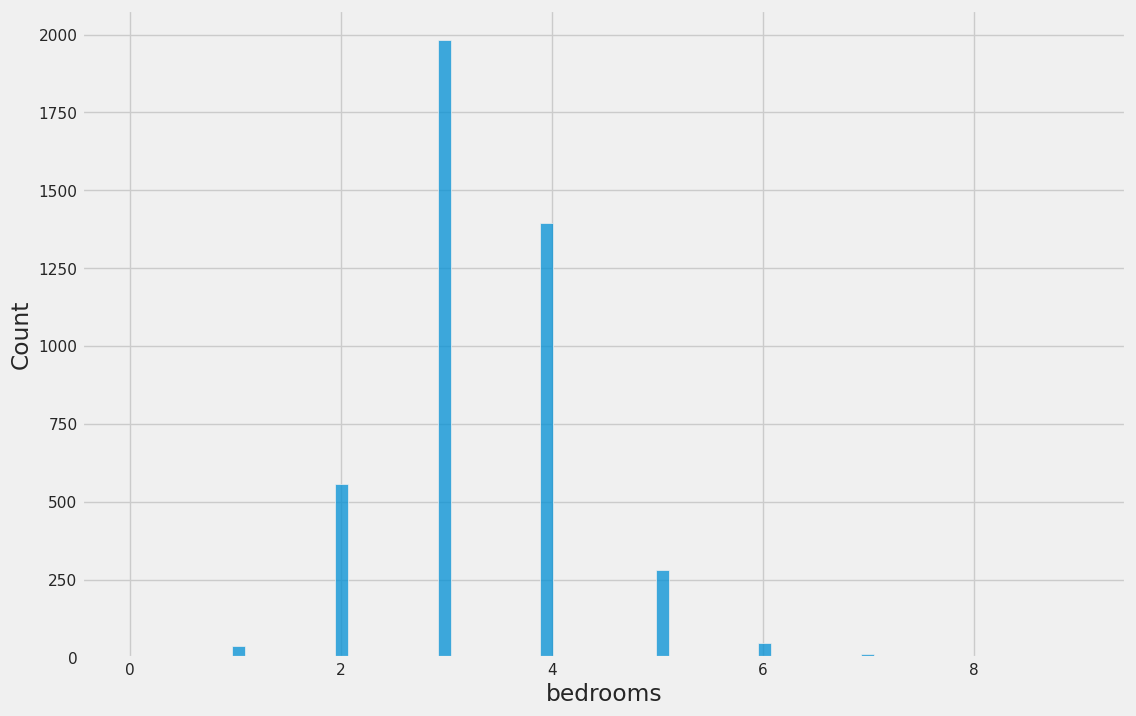

In [28]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.bedrooms)

We can see outliers, when the value >= 7. Let's delete this on:

In [29]:
data = data[data.bedrooms < 7]

Text(0, 0.5, 'Amount')

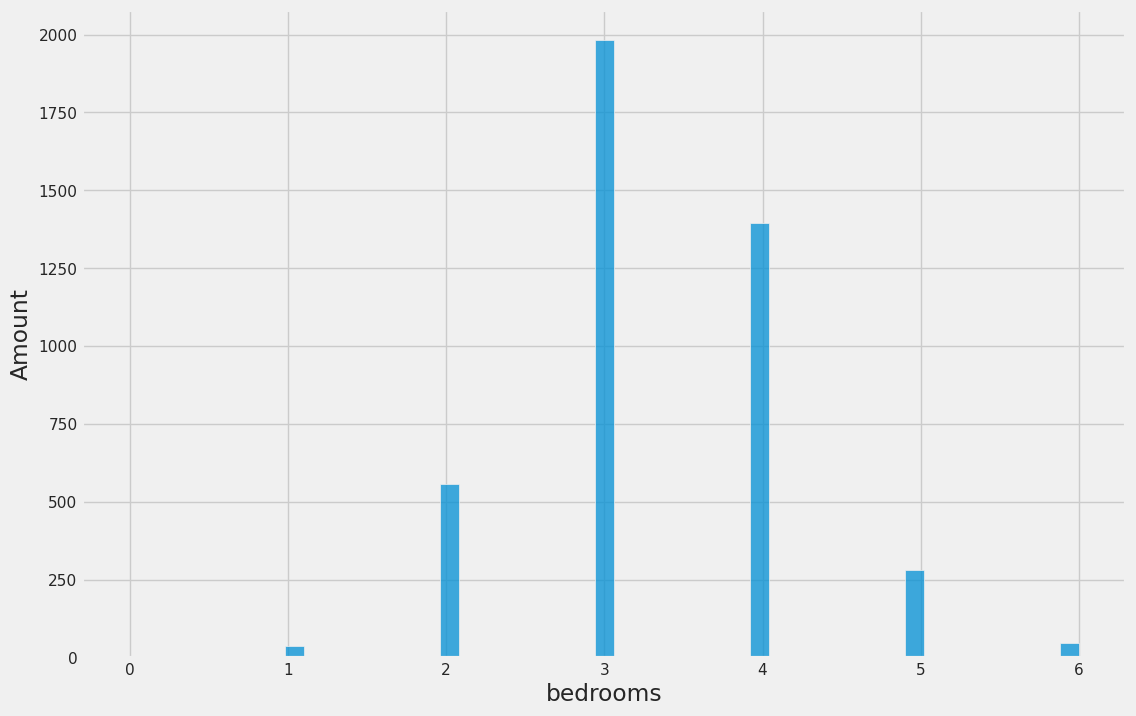

In [30]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(x=data.bedrooms)
plt.ylabel('Amount')

In [31]:
data.shape

(4299, 17)

# **Bathrooms**

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

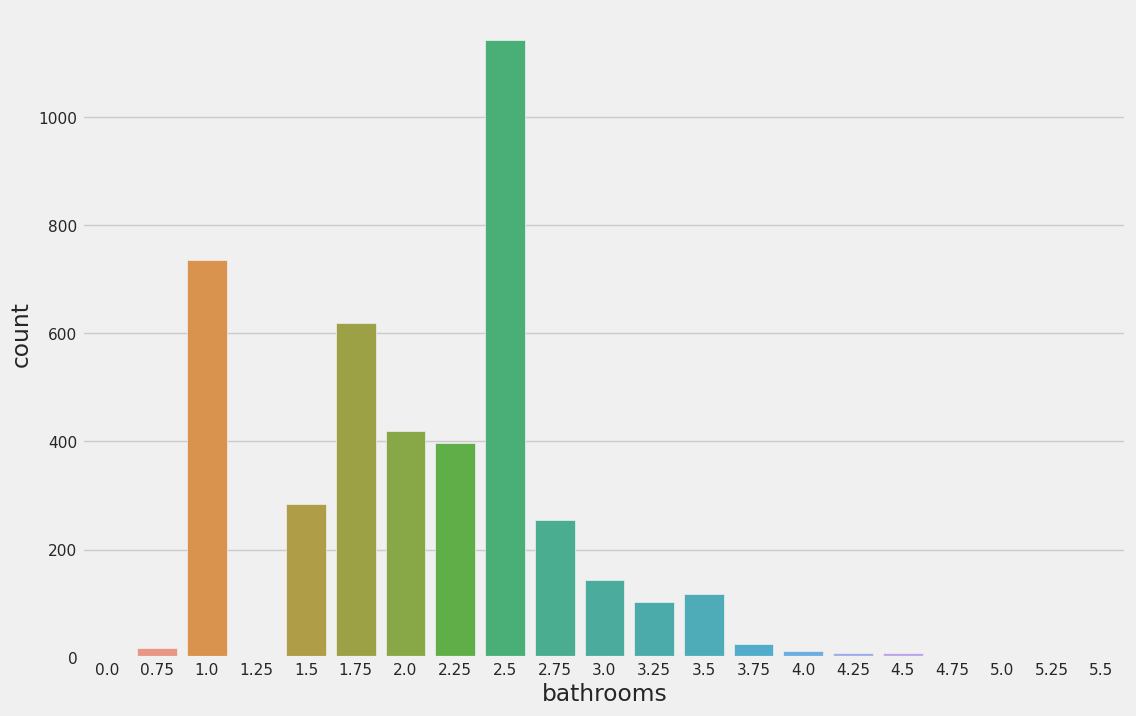

In [32]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x=data['bathrooms'])

 We can see that bathrooms column has float values, while bathroom is a physical entity and thus will not be able to contain float values. So we will change them to int column.By passing the column into <font color = red>float_to_int</font>  function that we are previosly implement.

In [33]:
for i in ["bathrooms"]:
    data[i] = data[i].apply(float_to_int)



Now let's check the bathrooms column, if it has outliers.


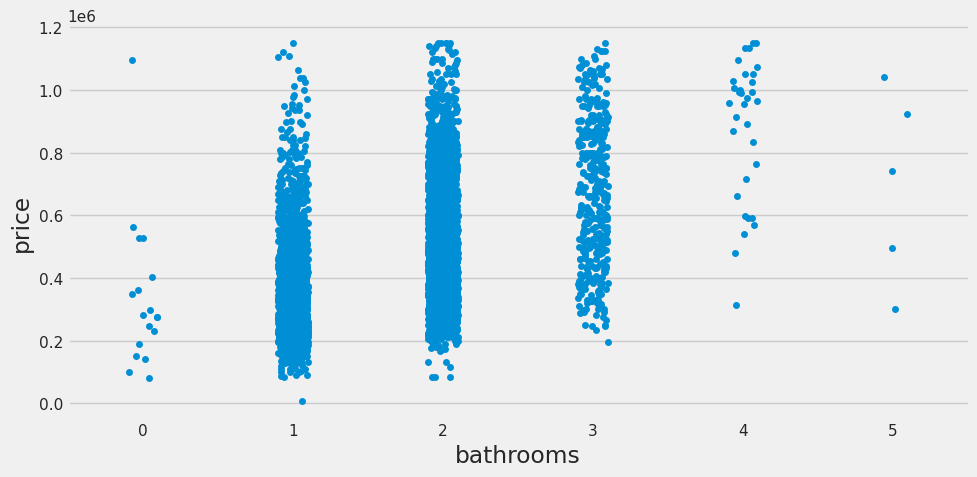

In [34]:
sns.catplot(x='bathrooms', y='price', data=data, height=5, aspect=2)

In [35]:
mask = (data.bathrooms < 3.75)
data = data[mask]
data.bathrooms = data.bathrooms.apply(lambda x: 1 if (x == 0.75)
                                                      or
                                                     (x == 1.25)
                                                  else x)

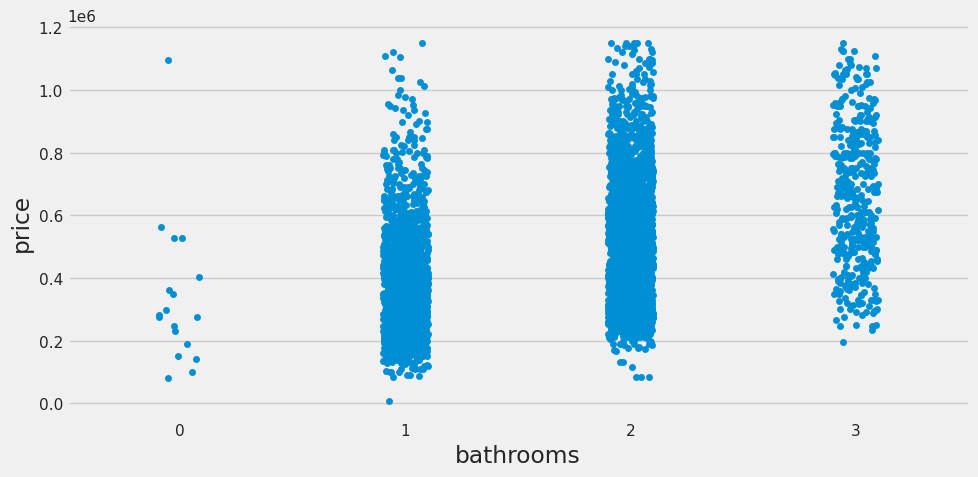

In [36]:
# Pretty good !
sns.catplot(x='bathrooms', y='price', data=data, height=5, aspect=2)

In [37]:
data.shape

(4261, 17)

**Both bedrooms and bathrooms data now makes more sense.**

# **Square footage**

In [38]:
sqft_cols = data.columns[data.columns.str.contains('sqft')]
sqft_cols


Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], dtype='object')

In [39]:
def show_count_plots(data, cols):
    fig = plt.figure(figsize=(10, 10))
    grid = GridSpec(ncols=2,
                    nrows=2, figure=fig)
    for i, name in enumerate(cols):
        ax = fig.add_subplot(grid[i])
        sns.histplot(data[name], kde=True, ax=ax)

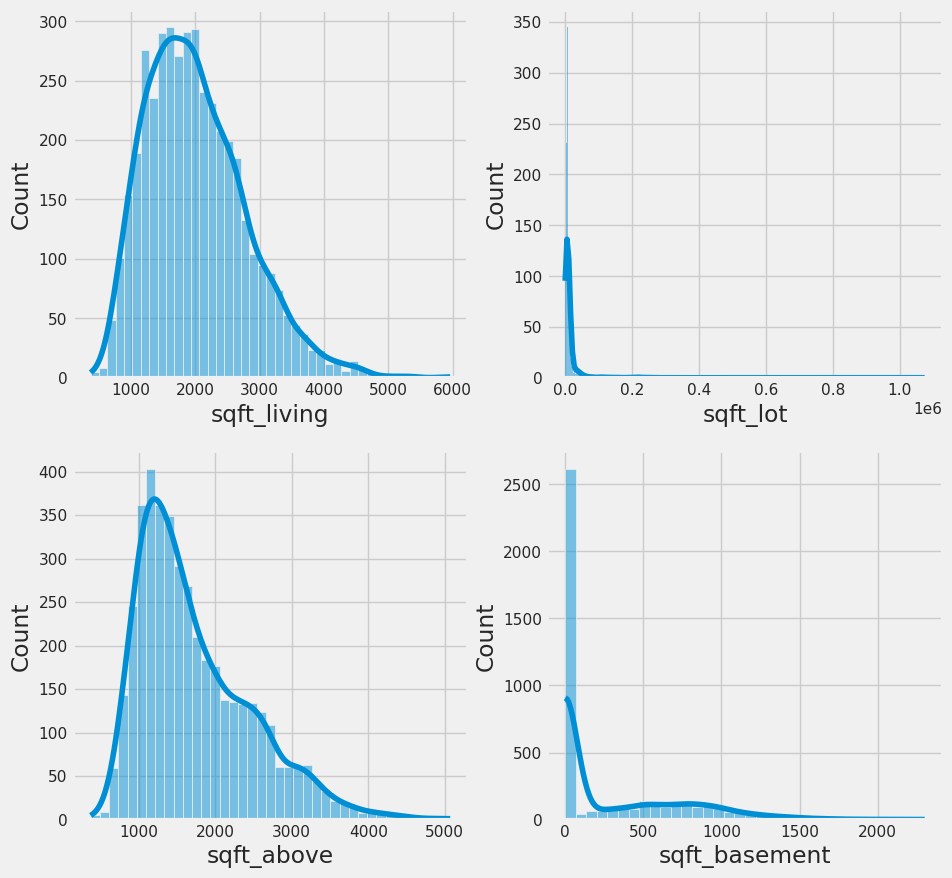

In [40]:
show_count_plots(data, sqft_cols)

# **Floors**

floors indicates an physical entity, by intution one can say, that this columns cannot conain float values(but have), we will use <b>.floors</b> to improve the feature.

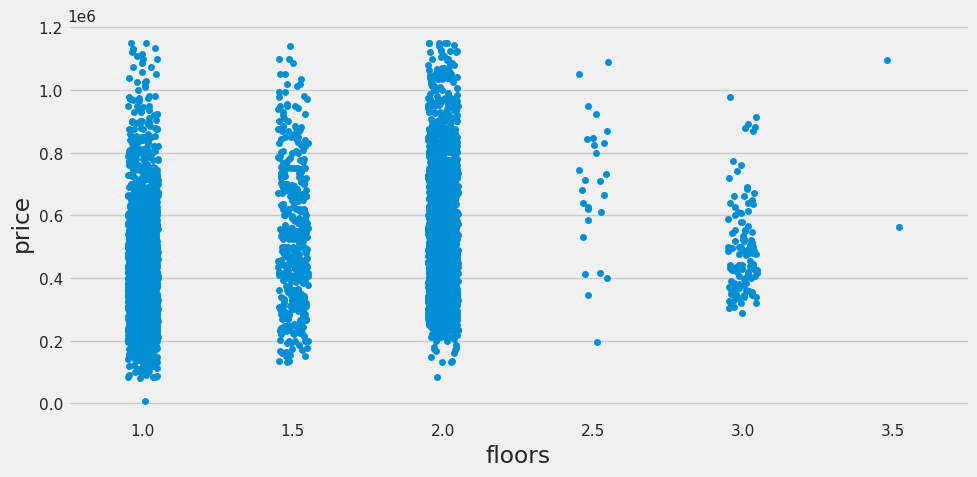

In [41]:
sns.catplot(x='floors', y='price', data=data, height=5, aspect=2)

In [42]:
mask_floors = {1: 1, 1.5:1, 2:2, 2.5:3, 3:3, 3.5:3}
data.floors = data.floors.map(mask_floors)

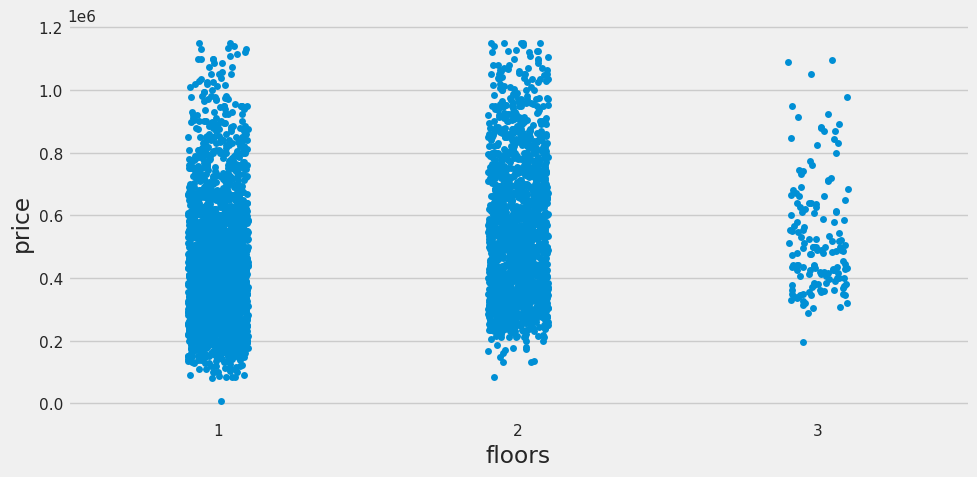

In [43]:
# Excellent !
sns.catplot(x='floors', y='price', data=data, height=5, aspect=2)

**Let's check the attributes again.**

In [44]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


# **WaterFront**

Now we will focus on the waterfront column. This column is one of the useless columns as it contains only 1 and 0 with 1 having 0.35 percentage and 0 having 99.65 percentage, and thus we will just remove it.

In [45]:
print(data.waterfront.value_counts())

0    4246
1      15
Name: waterfront, dtype: int64


<AxesSubplot:ylabel='waterfront'>

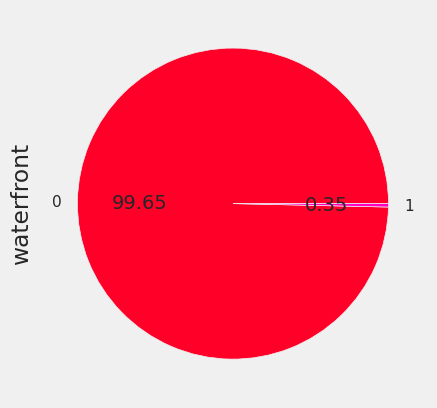

In [46]:
data["waterfront"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")


In [47]:
data.drop("waterfront" , axis = 1 , inplace = True)

# **View**

**View is one of the columns just is good with the dataset and thus do not much needs any preprocessing.**

0    3941
2     164
3      71
1      54
4      31
Name: view, dtype: int64


<AxesSubplot:ylabel='view'>

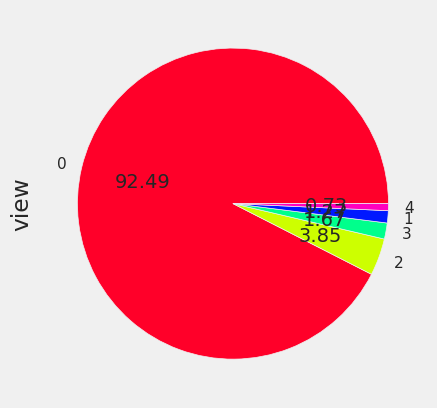

In [48]:
print(data.view.value_counts())

data["view"].value_counts().plot(kind = "pie" ,
                                 autopct = "%.2f" , cmap = "gist_rainbow")


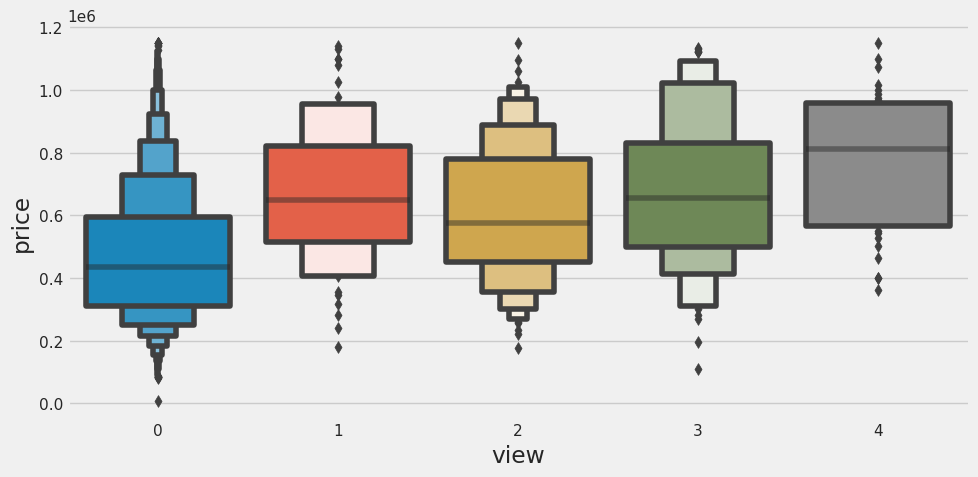

In [49]:
sns.catplot(x='view', y='price', data=data,
            kind='boxen', height=5, aspect=2)

# **Condition**

**Conditiion is also performing good but can be improved further a little bit.**

3    2666
4    1178
5     381
2      30
1       6
Name: condition, dtype: int64


<AxesSubplot:xlabel='condition', ylabel='price'>

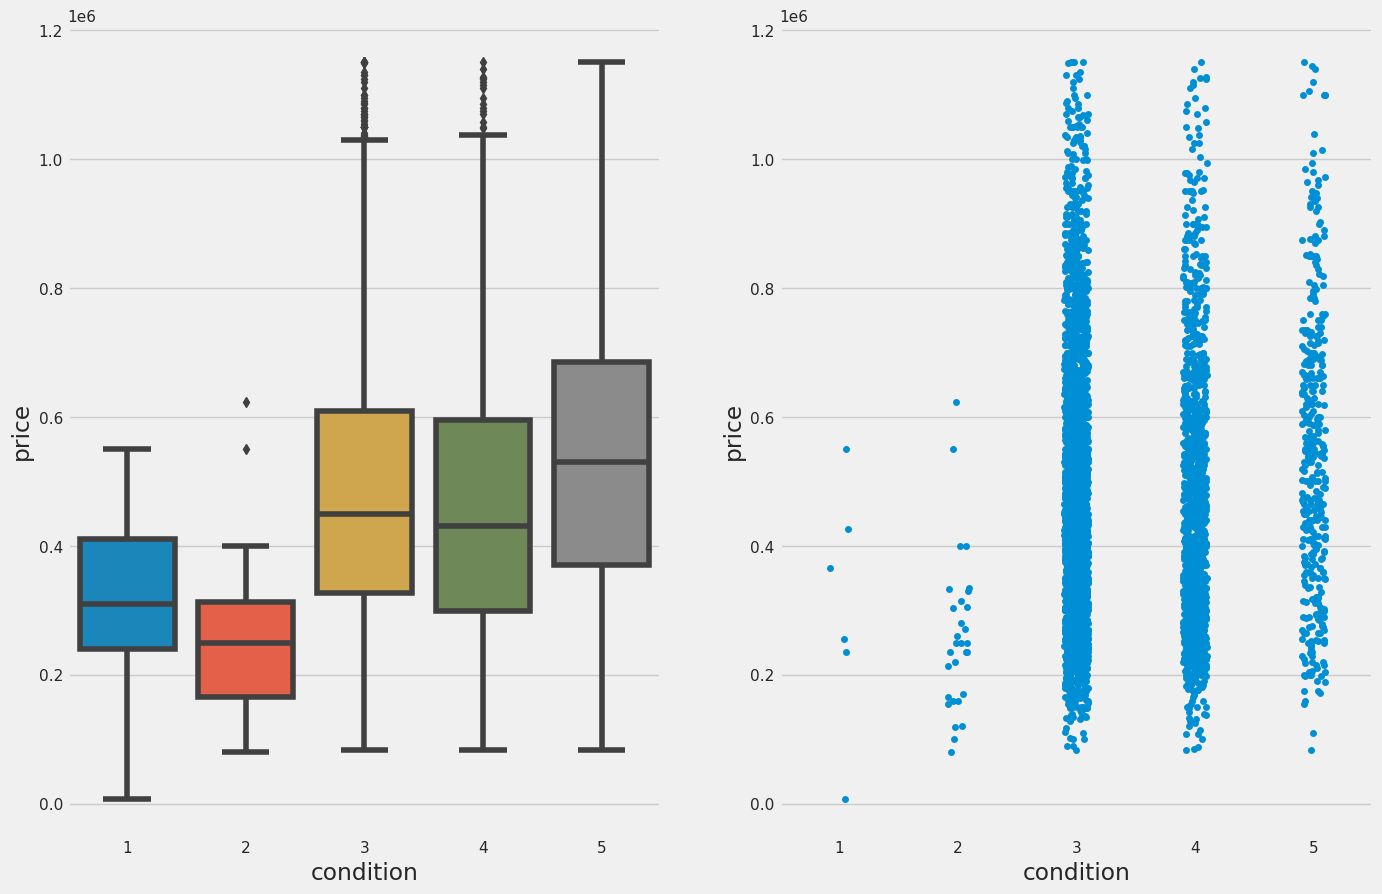

In [50]:
print(data.condition.value_counts())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
sns.boxplot(x='condition', y='price', data=data, ax=ax1)

ax2 = fig.add_subplot(122)
sns.stripplot(x='condition', y='price', data=data, ax=ax2)

Delete column with value = 1


In [51]:
mask_cond = data.condition > 1
data = data[mask_cond]

<AxesSubplot:ylabel='condition'>

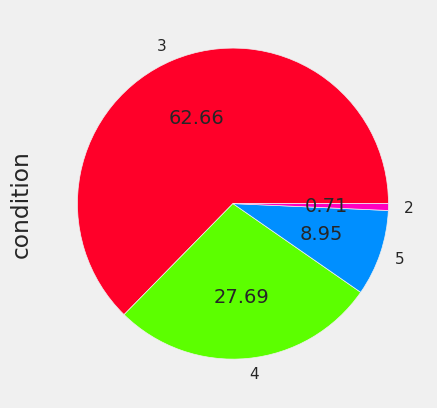

In [52]:
data["condition"].value_counts().plot(kind = "pie" ,
                                      autopct = "%.2f" , cmap = "gist_rainbow")

<AxesSubplot:xlabel='condition', ylabel='price'>

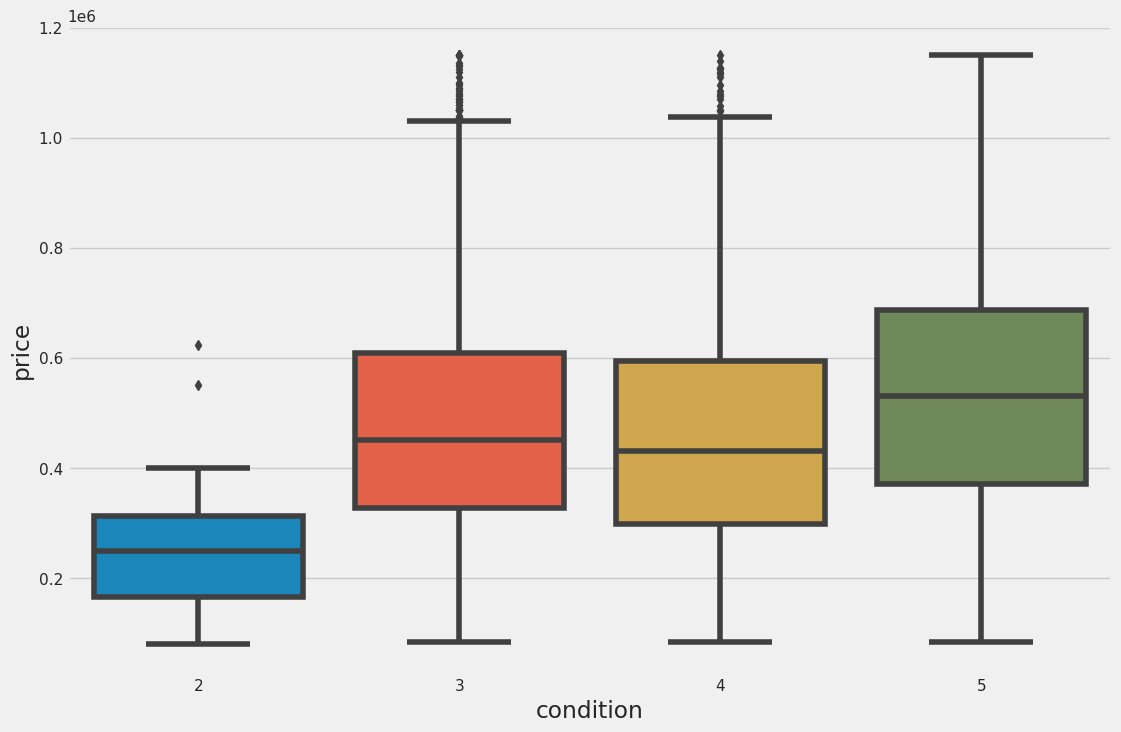

In [53]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='condition', y='price', data=data)

# **Years: built and renovated**

**year_built is highly populated with different values.**

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

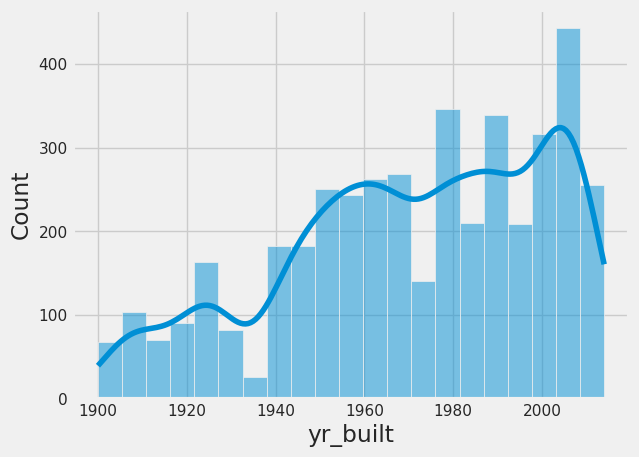

In [54]:
sns.histplot(data.yr_built, kde=True)

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

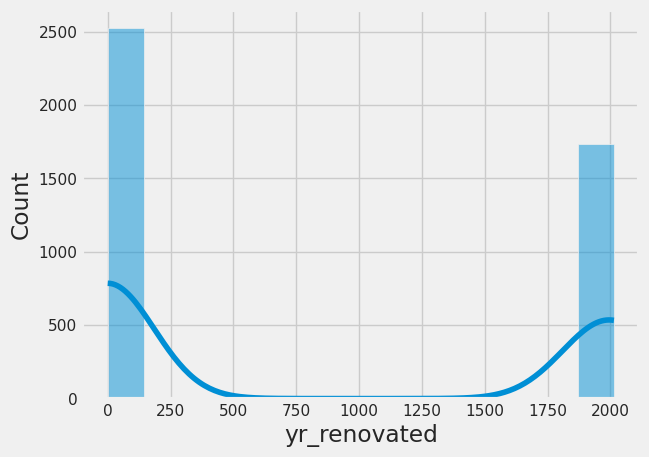

In [55]:
sns.histplot(data.yr_renovated, kde=True)

**If house is renovated, set the value is equal 1. Else is equal 0**

In [56]:
data.yr_renovated = data.yr_renovated.apply(lambda x: 0 if x==0 else 1)

0    2523
1    1732
Name: yr_renovated, dtype: int64


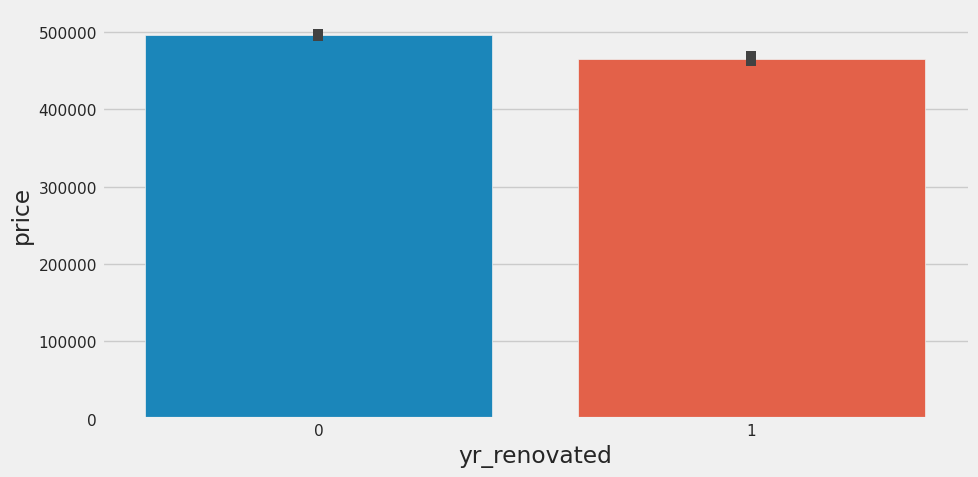

In [57]:
print(data.yr_renovated.value_counts())
sns.catplot(x='yr_renovated', y='price', data=data,
            kind='bar', height=5, aspect=2)

Checking the data


In [58]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1,1340,7912,1,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000.0,3,2,1930,11947,1,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2,2000,8030,1,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


# **Location information**

### **Street** 

In [59]:
data.street.value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
513 N 46th St            2
5010 Greenwood Ave N     2
6520-6588 8th Ave NW     2
                        ..
806 S 295th Pl           1
17904 Military Rd S      1
2525 276th Ct NE         1
501 NE Ravenna Blvd      1
18717 SE 258th St        1
Name: street, Length: 4185, dtype: int64

### **City**

**city have categorical values with high variance and needs to pass limited values during onehotencoding.**

In [60]:
data.city.value_counts().head(10)

Seattle        1447
Renton          288
Bellevue        226
Redmond         223
Kent            183
Issaquah        178
Kirkland        174
Auburn          172
Sammamish       161
Federal Way     142
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

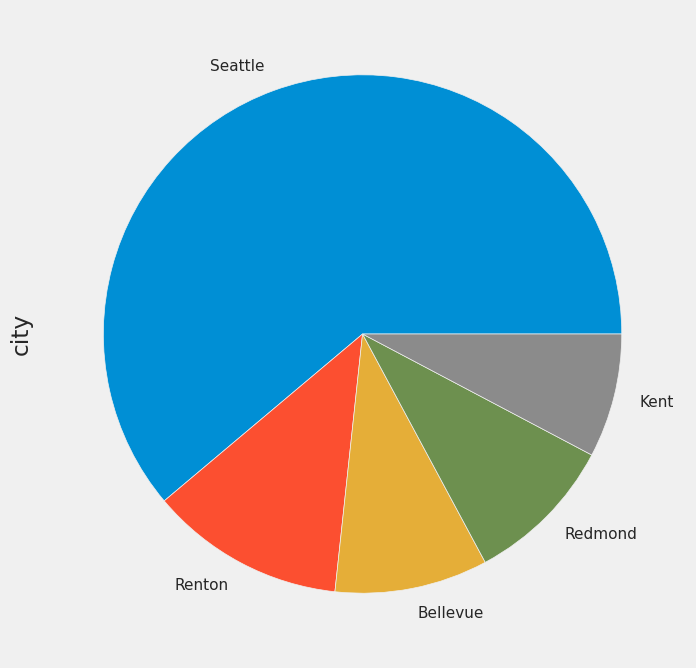

In [61]:
fig = plt.figure(figsize=(12, 8))
# Top 5 cities
data.city.value_counts().head(5).plot.pie()

### **State zip**

In [62]:
print(data.statezip.nunique())
print(data.statezip.value_counts())

77
WA 98103    142
WA 98052    131
WA 98117    129
WA 98115    123
WA 98059    104
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64


### **Country**

**country - is a useless columns with USA as 100 percentage**

<AxesSubplot:ylabel='country'>

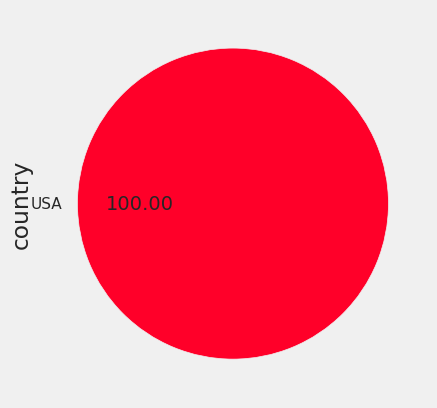

In [63]:
data["country"].value_counts().plot(kind = "pie" ,
                                    autopct = "%.2f" , cmap = "gist_rainbow")

In [64]:
data.drop('country', axis=1, inplace=True)

# **Checking the dataset**

**Now as our feature engineering is done we will take a look at the column and check if everything is right.**

<AxesSubplot:>

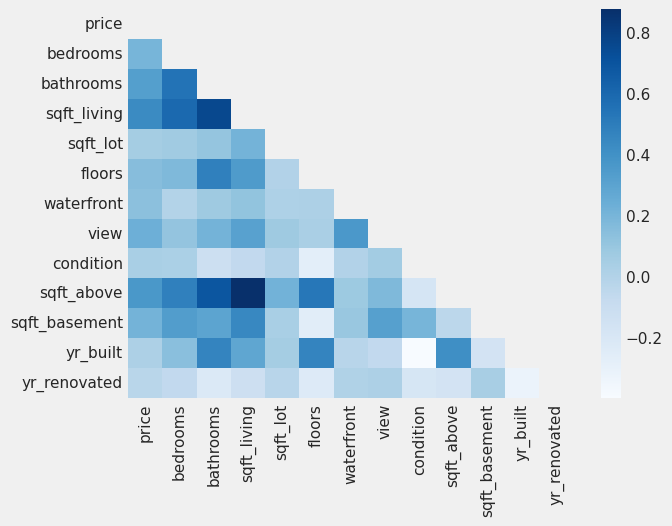

In [65]:
h_map = sns.heatmap(corr_data.corr(), mask=corr_mask, cmap='Blues')
h_map

In [66]:
print(data.shape)
data.head(3)

(4255, 15)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3,1,1340,7912,1,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133
2,342000.0,3,2,1930,11947,1,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3,2,2000,8030,1,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
